In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'C:\Users\Emincan\Desktop\Playground\train.csv')
# test = pd.read_csv(r'C:\Users\Emincan\Desktop\Playground\test.csv')

train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
train.shape

(74051, 10)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [5]:
train.drop('id' , axis =1 , inplace = True)

In [6]:
# simple preprocessing for categorical variable!
train = pd.get_dummies(train, columns=['Sex'])

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,74051.0,1.317460,0.287757,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74051.0,1.024496,0.237396,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74051.0,0.348089,0.092034,0.000000,0.300000,0.362500,0.412500,2.825000
Weight,74051.0,23.385217,12.648153,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74051.0,10.104270,5.618025,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74051.0,5.058386,2.792729,0.042524,2.863300,4.989512,6.988152,21.545620
Shell Weight,74051.0,6.723870,3.584372,0.042524,3.968930,6.931453,9.071840,28.491248
Age,74051.0,9.967806,3.175189,1.000000,8.000000,10.000000,11.000000,29.000000


In [8]:
train['Age'].nunique()

28

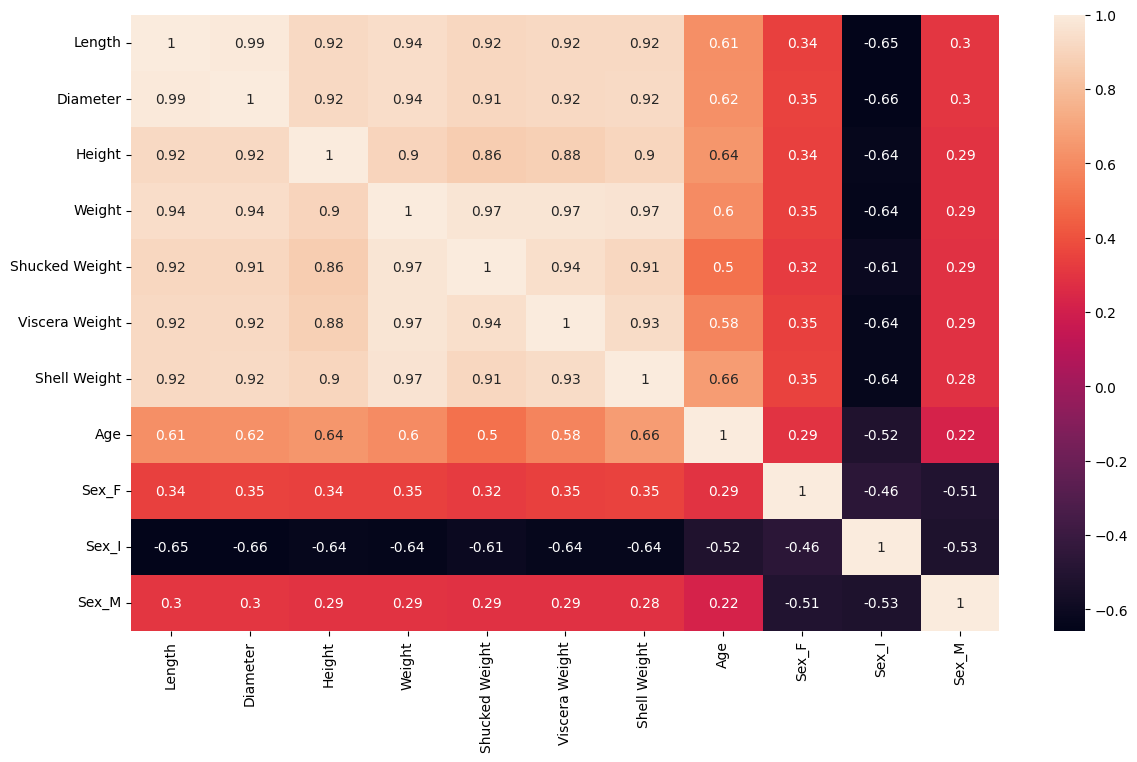

In [9]:
plt.figure(figsize=(14,8) ,dpi=100)

sns.heatmap(train.corr(numeric_only=True) , annot = True);

# Utils

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN



class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

    # Fonksiyonun özeti
    def summary(df):
        # Print the shape of the DataFrame
        print(f'data shape: {df.shape}')  
        # Create a summary DataFrame
        summ = pd.DataFrame(df.dtypes, columns=['data type'])
        # Calculate the number of missing values
        summ['#missing'] = df.isnull().sum().values 
        # Calculate the percentage of missing values
        summ['%missing'] = df.isnull().sum().values / len(df)* 100
        # Calculate the number of unique values
        summ['#unique'] = df.nunique().values
        # Create a descriptive DataFrame
        desc = pd.DataFrame(df.describe(include='all').transpose())
        # Add the minimum, maximum, and first three values to the summary DataFrame
        summ['min'] = desc['min'].values
        summ['max'] = desc['max'].values
        summ['first value'] = df.loc[0].values
        summ['second value'] = df.loc[1].values
        summ['third value'] = df.loc[2].values
        
        # Return the summary DataFrame
        return summ
    
    def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
        corr = df.corr()  
        fig, axes = plt.subplots(figsize=(14, 8))
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
        plt.title(title_name)
        plt.show()

    # # plot_correlation_heatmap(original, 'Original Dataset Correlation')
    # plot_correlation_heatmap(train, 'Train Dataset Correlation')

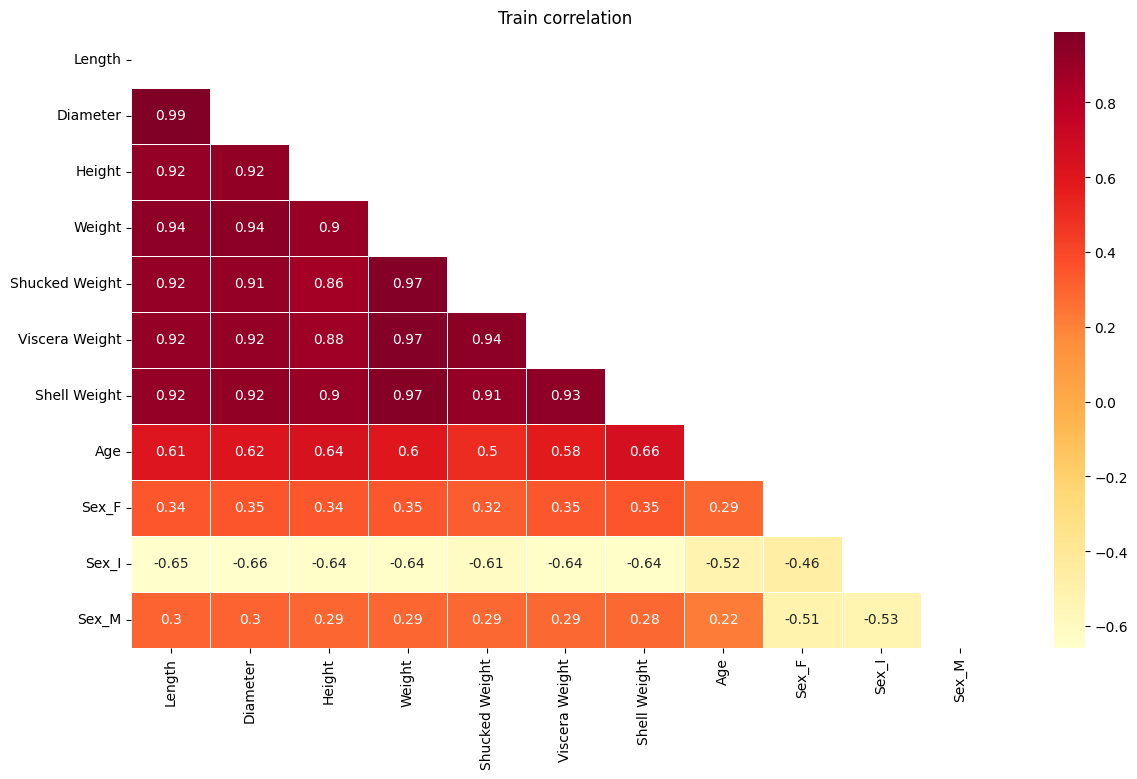

In [11]:
fonks.plot_correlation_heatmap(train)

# Train | Test Split

In [12]:
X = train.drop('Age' , axis = 1)
y = train['Age']

In [13]:
X_train , X_test , y_train , y_test = fonks.trainTest(X , y , test_size= 0.2 )

# Models

### Linear Model

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train , y_train)

lr_train_pred = np.round(lr.predict(X_train))
lr_pred = np.round(lr.predict(X_test))

fonks.simple_scores(y_train, lr_train_pred , y_test , lr_pred , 'LR')

LR Train R2 : 0.5385984312504916
LR Train Mae : 1.4601114112086429
LR Train RMSE : 2.15106791624151
LR Train MSE : 4.627093180283592

****************

LR Test R2 : 0.5546473557274159
LR Test Mae : 1.460941192357032
LR Test RMSE : 2.141096788115834
LR Test MSE : 4.584295456079941


In [15]:
lr_r2 = fonks.get_r2_score(y_test , lr_pred)
lr_mae = fonks.get_mae_score(y_test , lr_pred)
lr_rmse = fonks.get_rmse_score(y_test , lr_pred)
# nb_rocauc = fonks.get_roc_auc(y_test , nb_pred , "NB")
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')

lr_df = fonks.train_test_df(y_train, lr_train_pred , y_test , lr_pred , 'LR')
lr_df

,LR_train,LR_test
R2,0.538598,0.554647
mae,1.460111,1.460941
mse,4.627093,4.584295
rmse,2.151068,2.141097


### Ridge Model

In [16]:
from sklearn.linear_model import RidgeCV

rdg_grid = RidgeCV(alphas=np.arange(0.001,100,1) , cv = 5)

rdg_grid.fit(X_train , y_train)

print(f"Ridge Best Score : {rdg_grid.best_score_}")
print(f"Ridge Best Alpha : {rdg_grid.alpha_}")

Ridge Best Score : 0.547233026759405
Ridge Best Alpha : 4.0009999999999994


In [17]:
from sklearn.linear_model import Ridge

rdg = Ridge(alpha = 4)

rdg.fit(X_train , y_train)

rdg_train_pred = np.round(rdg.predict(X_train))
rdg_pred = np.round(rdg.predict(X_test))

fonks.simple_scores(y_train, rdg_train_pred , y_test , rdg_pred , 'Ridge')

Ridge Train R2 : 0.5385243670314219
Ridge Train Mae : 1.4604827819041188
Ridge Train RMSE : 2.151240554116286
Ridge Train MSE : 4.627835921674544

****************

Ridge Test R2 : 0.5543062803275193
Ridge Test Mae : 1.4621565053001149
Ridge Test RMSE : 2.141916515678829
Ridge Test MSE : 4.587806360137735


In [18]:
rdg_r2 = fonks.get_r2_score(y_test , rdg_pred)
rdg_mae = fonks.get_mae_score(y_test , rdg_pred)
rdg_rmse = fonks.get_rmse_score(y_test , rdg_pred)
# nb_rocauc = fonks.get_roc_auc(y_test , nb_pred , "NB")
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')

rdg_df = fonks.train_test_df(y_train, rdg_train_pred , y_test , rdg_pred , 'Ridge')
all_df = pd.concat([lr_df , rdg_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test
R2,0.538598,0.554647,0.538524,0.554306
mae,1.460111,1.460941,1.460483,1.462157
mse,4.627093,4.584295,4.627836,4.587806
rmse,2.151068,2.141097,2.151241,2.141917


### Lasso

In [19]:
from sklearn.linear_model import LassoCV

las_grid = LassoCV(alphas=np.arange(0.001,100,1) , cv = 5)

las_grid.fit(X_train , y_train)

# print(f"Lasso Best Score : {las_grid.best_score_}")
print(f"Lasso Best Alpha : {las_grid.alpha_}")

Lasso Best Alpha : 0.001


In [20]:
# 0.001 is too low for C value. So Lasso is not good model for that dataset.

### SVR

In [21]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# import dpctl
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     svr_base = SVR()

#     params = {'kernel' : ['linear' , 'poly' , 'rbf' ] , 'degree' : [2,3] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,10) }

#     svr_grid = GridSearchCV(svr_base , params , scoring='neg_mean_squared_error' , cv = 3)
#     svr_grid.fit(X_train , y_train)

# print(f'Best parameters: {svr_grid.best_params_}')
# print(f'Best score: {svr_grid.best_score_:.2f}')

# unpatch_sklearn()

In [22]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf' , C=300 , gamma='scale')
svr.fit(X_train , y_train)

svr_train_pred = np.round(svr.predict(X_train))
svr_pred = np.round(svr.predict(X_test))

fonks.simple_scores(y_train, svr_train_pred , y_test , svr_pred , 'SVR')

SVR Train R2 : 0.5526251843756704
SVR Train Mae : 1.351147873058744
SVR Train RMSE : 2.118118997867912
SVR Train MSE : 4.4864280891289665

****************

SVR Test R2 : 0.565883166497084
SVR Test Mae : 1.3529808925798392
SVR Test RMSE : 2.1139153659335297
SVR Test MSE : 4.4686381743298895


In [23]:
svr_r2 = fonks.get_r2_score(y_test , svr_pred)
svr_mae = fonks.get_mae_score(y_test , svr_pred)
svr_rmse = fonks.get_rmse_score(y_test , svr_pred)

svr_df = fonks.train_test_df(y_train, svr_train_pred , y_test , svr_pred , 'SVR')
all_df = pd.concat([all_df , svr_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test
R2,0.538598,0.554647,0.538524,0.554306,0.552625,0.565883
mae,1.460111,1.460941,1.460483,1.462157,1.351148,1.352981
mse,4.627093,4.584295,4.627836,4.587806,4.486428,4.468638
rmse,2.151068,2.141097,2.151241,2.141917,2.118119,2.113915


### Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import dpctl
from sklearnex import patch_sklearn, config_context , unpatch_sklearn

patch_sklearn()

with config_context(target_offload = 'gpu:0'):
    dt_base = DecisionTreeRegressor(random_state= 53)

    params = {'max_depth' : np.arange(2,8) , 'min_samples_split' : np.arange(2,6)}

    dt_grid = GridSearchCV(dt_base , params , cv = 3 , scoring= 'neg_mean_absolute_error' )
    dt_grid.fit(X_train , y_train)

print(f"DT Best Params is : {dt_grid.best_params_}")
print(f"DT Best Score is : {dt_grid.best_score_}")

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


DT Best Params is : {'max_depth': 7, 'min_samples_split': 2}
DT Best Score is : -1.4653443814032883


In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=7 , min_samples_split=2 , random_state= 53)
dt.fit(X_train , y_train)

dt_train_pred = np.round(dt.predict(X_train))
dt_pred = np.round(dt.predict(X_test))

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred , 'DT')

DT Train R2 : 0.5605062905957697
DT Train Mae : 1.4103983794733288
DT Train RMSE : 2.0993793494595505
DT Train MSE : 4.407393652937205

****************

DT Test R2 : 0.5599012287142835
DT Test Mae : 1.4296806427655122
DT Test RMSE : 2.128429944844968
DT Test MSE : 4.530214030112754


In [26]:
dt_r2 = fonks.get_r2_score(y_test , dt_pred)
dt_mae = fonks.get_mae_score(y_test , dt_pred)
dt_rmse = fonks.get_rmse_score(y_test , dt_pred)

dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([all_df , dt_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test,DT_train,DT_test
R2,0.538598,0.554647,0.538524,0.554306,0.552625,0.565883,0.560506,0.559901
mae,1.460111,1.460941,1.460483,1.462157,1.351148,1.352981,1.410398,1.429681
mse,4.627093,4.584295,4.627836,4.587806,4.486428,4.468638,4.407394,4.530214
rmse,2.151068,2.141097,2.151241,2.141917,2.118119,2.113915,2.099379,2.128430


### Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import dpctl
from sklearnex import patch_sklearn, config_context , unpatch_sklearn

patch_sklearn()

with config_context(target_offload = 'gpu:0'):
    rf_base = RandomForestRegressor()

    params = {'n_estimators' : np.arange(80,500,10) , 'max_depth' : np.append(np.arange(2,8) , None) , 'max_features' : np.append(np.arange(2,6) , None) , 'min_samples_split' : [2,3]}

    rf_grid = GridSearchCV(rf_base , params , scoring= 'neg_mean_absolute_error' , cv = 3)
    rf_grid.fit(X_train , y_train)

print(f"RF Best Params is : {rf_grid.best_params_}")
print(f"RF Best Score is : {rf_grid.best_score_}")

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(n_estimators = 230 , max_depth=6 , min_samples_split=2 , max_features=5)
rf = rf_grid.best_estimator_
rf.fit(X_train , y_train)

rf_train_pred = np.round(rf.predict(X_train))
rf_pred = np.round(rf.predict(X_test))

fonks.simple_scores(y_train, rf_train_pred , y_test , rf_pred , 'RF')

In [ ]:
rf_r2 = fonks.get_r2_score(y_test , rf_pred)
rf_mae = fonks.get_mae_score(y_test , rf_pred)
rf_rmse = fonks.get_rmse_score(y_test , rf_pred)

rf_df = fonks.train_test_df(y_train, rf_train_pred , y_test , rf_pred , 'RF')
all_df = pd.concat([all_df , rf_df] , axis = 1)
all_df

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

patch_sklearn()

with config_context(target_offload = 'gpu:0'):
    gb_base = GradientBoostingRegressor()

    params = {'n_estimators' : np.arange(80,500,10) , 'learning_rate' : [0.01,0.1,1] , 'subsample' : [0.8 , 1] , 'max_depth' : np.arange(2,7)}

    gb_grid = GridSearchCV(gb_base , params , scoring= 'neg_root_mean_squared_error' , cv = 5 , n_iter=50)
    gb_grid.fit(X_train , y_train)

print(f"GB Best Params is : {gb_grid.best_params_}")
print(f"GB Best Score is : {gb_grid.best_score_}")

unpatch_sklearn()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# gb = GradientBoostingRegressor(n_estimators= 240 , max_depth=10 , learning_rate= 0.01 , subsample= 0.8 )
gb = gb_grid.best_estimator_
gb.fit(X_train , y_train)

gb_train_pred = np.round(gb.predict(X_train))
gb_pred = np.round(gb.predict(X_test))

fonks.simple_scores(y_train, gb_train_pred , y_test , gb_pred , 'GB')

In [ ]:
gb_r2 = fonks.get_r2_score(y_test , gb_pred)
gb_mae = fonks.get_mae_score(y_test , gb_pred)
gb_rmse = fonks.get_rmse_score(y_test , gb_pred)

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_test , gb_pred , 'GB')
all_df = pd.concat([all_df , gb_df] , axis = 1)
all_df

### XGB Model

In [ ]:
from xgboost import XGBRegressor

patch_sklearn()

with config_context(target_offload = 'gpu:0'):
    xgb_base = XGBRegressor(tree_method = 'gpu_hist')

    params = {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 150 , 200, 300 , 400 , 500],
        'max_depth': [3, 4, 5, 6 , 7],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
        # 'subsample': [0.7, 0.8, 0.9],
        # 'colsample_bytree': [0.6, 0.7, 0.8],
        # 'reg_alpha': [0, 0.01, 0.05],
        # 'reg_lambda': [0, 0.01, 0.05],
    }

    params2 = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'n_estimators': [100, 200, 300, 400, 500],
        'gamma': [0, 1, 5, 10],
        'min_child_weight': [1, 3, 5, 7],
        'scale_pos_weight': [1, 2, 3, 4, 5]
    }

    xgb_rnd = RandomizedSearchCV(xgb_base , params , scoring= 'neg_root_mean_squared_error' , cv = 5 , n_iter= 100)
    xgb_rnd.fit(X_train , y_train)

print(f"XGB Best Params is : {xgb_rnd.best_params_}")
print(f"XGB Best Score is : {xgb_rnd.best_score_}")

unpatch_sklearn()

In [ ]:
from xgboost import XGBRegressor

# xgb = XGBRegressor(n_estimators = 500 , min_child_weight = 5 , max_depth = 3 , learning_rate = 0.1 , gamma = 0, colsample_bytree = 0.7 , subsample= 0.7 , reg_alpha = 0.05 , reg_lambda=0.01)
xgb = XGBRegressor(n_estimators = 500 , min_child_weight = 5 , max_depth = 3 , learning_rate = 0.1 , gamma = 0)
xgb.fit(X_train , y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

fonks.simple_scores(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

In [ ]:
xgb_r2 = fonks.get_r2_score(y_test , xgb_pred)
xgb_mae = fonks.get_mae_score(y_test , xgb_pred)
xgb_rmse = fonks.get_rmse_score(y_test , xgb_pred)

xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')
all_df = pd.concat([all_df , xgb_df] , axis = 1)
all_df

### LightGBM

In [ ]:
from lightgbm import LGBMRegressor

patch_sklearn()

with config_context(target_offload='gpu:0'):
        lgb_base = LGBMRegressor(device = 'gpu')

        params = {
                'n_estimators': [100, 200, 300 , 400 , 500],
                'max_depth': [3, 5, 7 , 6 , 7, 8],
                'learning_rate': [1,0.1,0.01],
                'subsample': [0.7,0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0],
                }

        lgb_rnd = RandomizedSearchCV(lgb_base , params , scoring='neg_mean_squared_error' , cv = 5,  n_iter= 50)
        lgb_rnd.fit(X_train,y_train)


print(f'Best parameters: {lgb_rnd.best_params_}')
print(f'Best score: {lgb_rnd.best_score_:.2f}')

unpatch_sklearn()

In [ ]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators= 100 , learning_rate = 0.1 , max_depth = 6 , subsample = 0.9 , colsample_bytree = 1)
# lgb = lgb_grid.best_estimator_
lgb.fit(X_train , y_train)

lgb_train_pred = lgb.predict(X_train)
lgb_pred = lgb.predict(X_test)

fonks.simple_scores(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')

In [ ]:
lgb_r2 = fonks.get_r2_score(y_test , lgb_pred)
lgb_mae = fonks.get_mae_score(y_test , lgb_pred)
lgb_rmse = fonks.get_rmse_score(y_test , lgb_pred)

lgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , lgb_pred , 'LGB')
all_df = pd.concat([all_df , lgb_df] , axis = 1)
all_df

### CatBoost

In [ ]:
params = {'learning_rate': 0.03,
          'objective':'MAE',
          'depth': 6,
          'early_stopping_rounds':1000,
          'iterations': 10000,
          'use_best_model': True,
          'eval_metric': "RMSE",
          'random_state': 986,
          'allow_writing_files': False,
          'thread_count':24
          }

In [ ]:
# X_train['X1 transaction date'] = X_train['X1 transaction date'].astype(int).astype('category')
# X_test['X1 transaction date'] = X_test['X1 transaction date'].astype(int).astype('category')

In [ ]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(**params,
                #        cat_features=['X1 transaction date']
                        )
cb.fit(X_train,y_train,
        eval_set=[(X_test,y_test)],
        verbose=500)

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_test)

fonks.simple_scores(y_train, cb_train_pred , y_test , cb_pred , 'CB')

In [ ]:
cb_r2 = fonks.get_r2_score(y_test , cb_pred)
cb_mae = fonks.get_mae_score(y_test , cb_pred)
cb_rmse = fonks.get_rmse_score(y_test , cb_pred)

cb_df = fonks.train_test_df(y_train, cb_train_pred , y_test , cb_pred , 'CB')
all_df = pd.concat([all_df , cb_df] , axis = 1)
all_df

### NN Model

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=10)

model_train_pred = model.predict(X_train)
model_pred = model.predict(X_test)

fonks.simple_scores(y_train, model_train_pred , y_test , model_pred , 'Model')

In [ ]:
all_df

# Compare Models

In [ ]:
compare = pd.DataFrame({"Model": ["LinearRegression", "Ridge", "SVR", "DecisionTree", "RandomForest", "GradientBoosting",
                                 "XGBoost", "LGBM" , "CatBoost"],
                        "R2": [lr_r2, rdg_r2, svr_r2, dt_r2, rf_r2 , gb_r2, xgb_r2, lgb_r2 , cb_r2],
                        "MAE": [lr_mae, rdg_mae, svr_mae, dt_mae, rf_mae, gb_mae, xgb_mae, lgb_mae , cb_mae],
                        "RMSE": [lr_rmse, rdg_rmse, svr_rmse, dt_rmse, rf_rmse, gb_rmse, xgb_rmse, lgb_rmse , cb_rmse],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="MAE", ascending=True)
ax=sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="RMSE", ascending=True)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
#

In [ ]:
gb_pred

In [ ]:
xgb_pred

In [ ]:
cb_pred

In [ ]:
lgb_pred